### 1. Import libraries

In [5]:
# Library for linear algebra operations
import numpy as np 
# Image manipulation library (read, plot, etc.)
from PIL import Image 
# Library for data manipulation and linear algebra
import pandas as pd 
# Library for data visualization
import matplotlib.pyplot as plt 
# Module to find files given a directory
from glob import glob 

%matplotlib inline

### 2. Creating datasets that contain the directory of each image

In [6]:
# Access the directory with images
data_dir = './CrackForest-dataset-master/image' 
# Create a dataset with all image directories
image_files = glob(data_dir + '/*.jpg') 

# Access the directory with crack images
data_dir_asphalt_crack = './Asphalt Crack Dataset/448/Cracks'
# Create a dataset with all crack image directories
asphalt_crack_files = glob(data_dir_asphalt_crack + '/*.jpg')

# Access the directory with noncrack images
data_dir_asphalt_noncrack = './Asphalt Crack Dataset/448/NonCracks' 
# Create a dataset with all noncrack image directories
asphalt_noncrack_files = glob(data_dir_asphalt_noncrack + '/*.jpg')

### 3. Creating functions so that, given a dataset that has the directory of images, double or triple my number of data

In [7]:
# The function below will create 2 datasets containing the pixels of each image contained in the directories dataset   
# The first dataset contains the original images, the second contains the images rotated 180 °
# And in the end a dataset will be returned that joins the previous two, that way we can
# duplicate my data number

def df_create_2(df_name, df_name_rotate, image_data): # (empty dataframe1, empty rotated dataframe1, directory dataset)    
    
    #with this for we going to scan each row of my dataset with dir
    for file in range(0, len(image_data),1): 
        # We are reading the images from the dataset that contains the dirs
        img1 = Image.open(image_data[file],'r')
        # Transforming the image to grayscale
        img1 = img1.convert('L') 
        # Resize the image
        img1 = img1.resize((100, 100),Image.ANTIALIAS) 
        # Rotating the image in 180°
        img1_rotate = img1.rotate(180) 
        
        # Converting the image to pixels and saving to a 1-dimensional Numpy Array
        img1_n = np.asarray(img1.getdata(), dtype=np.float64) 
        # Doing the same thing for the rotated image
        img1_n_rotate = np.asarray(img1_rotate.getdata(), dtype=np.float64)
        
        # Adding the pixels of an image to the empty dataframe1
        df_name[file] = img1_n 
        # Same thing for rotated images
        df_name_rotate[file] = img1_n_rotate 
    
    # Taking the Matrix transpose so that the lines are the images and the columns are the pixels
    df_name = df_name.T 
    # Taking the Matrix transpose so that the lines are the images and the columns are their pixels
    df_name_rotate = df_name_rotate.T 
    
    # Joining the two matrices
    df_concat = pd.concat([df_name,df_name_rotate], ignore_index=True) 
    return df_concat # Returning the desired DataFrame (Array)

In [8]:
# The function below does the same thing as df_create_2, but it triples my image number
# That is, it creates three dataframes (arrays), the first being the original images
# The second the images rotated by 90 ° and the third the images rotated by 180 °
def df_create_3(df_name, df_name_rotate90,df_name_rotate180, image_data):
    #df_name = pd.DataFrame()
    for file in range(0, len(image_data),1):
        img1 = Image.open(image_data[file],'r')
        img1 = img1.convert('L') # Makes it greyscale
        img1 = img1.resize((100, 100),Image.ANTIALIAS)
        img1_rotate90 = img1.rotate(90)
        img1_rotate180 = img1.rotate(180)
        
        img1_n = np.asarray(img1.getdata(), dtype=np.float64)
        img1_n_rotate90 = np.asarray(img1_rotate90.getdata(), dtype=np.float64)
        img1_n_rotate180 = np.asarray(img1_rotate180.getdata(), dtype=np.float64)

        df_name[file] = img1_n
        df_name_rotate90[file] = img1_n_rotate90
        df_name_rotate180[file] = img1_n_rotate180
        
    df_name = df_name.T
    df_name_rotate90 = df_name_rotate90.T
    df_name_rotate180 = df_name_rotate180.T
    df_concat = pd.concat([pd.concat([df_name,df_name_rotate90], ignore_index=True),df_name_rotate180], ignore_index=True)   
    #df_concat = df_concat.reset_index().drop('index', axis=1)
    return df_concat

In [9]:
# Function that will apply a filter to all images on my DataFrame
# Function copied from TensorFlow introduction course
# Link: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%203%20-%20Notebook.ipynb
def df_filter(df_original):
    df_transformed = pd.DataFrame()
    for k in range(0, len(df_original)-1, 1):
        i = np.asarray(df_original.loc[k,:]).reshape(100,100)
        i_transformed = np.copy(i)
        size_x = i_transformed.shape[0]
        size_y = i_transformed.shape[1]
        filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
        weight  = 1
        for x in range(1,size_x-1):
          for y in range(1,size_y-1):
              convolution = 0.0
              convolution = convolution + (i[x - 1, y-1] * filter[0][0])
              convolution = convolution + (i[x, y-1] * filter[0][1])
              convolution = convolution + (i[x + 1, y-1] * filter[0][2])
              convolution = convolution + (i[x-1, y] * filter[1][0])
              convolution = convolution + (i[x, y] * filter[1][1])
              convolution = convolution + (i[x+1, y] * filter[1][2])
              convolution = convolution + (i[x-1, y+1] * filter[2][0])
              convolution = convolution + (i[x, y+1] * filter[2][1])
              convolution = convolution + (i[x+1, y+1] * filter[2][2])
              convolution = convolution * weight
              if(convolution<0):
                convolution=0
              if(convolution>255):
                convolution=255
              i_transformed[x, y] = convolution

        new_x = int(size_x/2)
        new_y = int(size_y/2)
        newImage = np.zeros((new_x, new_y))
        for x in range(0, size_x, 2):
          for y in range(0, size_y, 2):
            pixels = []
            pixels.append(i_transformed[x, y])
            pixels.append(i_transformed[x+1, y])
            pixels.append(i_transformed[x, y+1])
            pixels.append(i_transformed[x+1, y+1])
            newImage[int(x/2),int(y/2)] = max(pixels)
        df_transformed[k] = newImage.flatten()
    return df_transformed.T

### 4. Creating / loading datasets where each row represents an image and each column represents the pixels in that image

In [23]:
# DataFrame 1 with crack images, using the df_create_2 function
df_crack1 = pd.DataFrame()
df_crack1_rotate = pd.DataFrame()
df_crack1 = df_create_2(df_crack1, df_crack1_rotate, image_files)

# Dataframe 2 with crack images, using the df_create_2 function
df_crack2 = pd.DataFrame()
df_crack2_rotate = pd.DataFrame()
df_crack2 = df_create_2(df_crack2, df_crack2_rotate, asphalt_crack_files)

# Dataframe 3 combining Dataframes 1 and 2, totaling 710 crack images
df_crack = pd.concat([df_crack1, df_crack2], ignore_index=True)
df_crack_filter = df_filter(df_crack) # It's the same df_crack dataframe but with a filter

# Dataframe with crack-free images
# Here I call the df_create_3 function and triple the number of data I have from imgs without cracking
df_non_crack = pd.DataFrame()
df_non_crack_rotate90 = pd.DataFrame()
df_non_crack_rotate180 = pd.DataFrame()
df_non_crack = df_create_3(df_non_crack, df_non_crack_rotate90, df_non_crack_rotate180, asphalt_noncrack_files)
df_non_crack_filter = df_filter(df_non_crack) #  It's the same df_crack dataframe but with a filter

### 5. Visualization of DataFrames

* Dataframe with crack images: 710 images
* Dataframe with images without cracks: 600 images

In [24]:
# Creating the label (target value) column
df_crack['label'] = 1
df_crack_filter['label'] = 1
df_non_crack['label'] = 0
df_non_crack_filter['label'] = 0

crack_noncrack = pd.concat([df_crack, df_non_crack], ignore_index=True)
crack_noncrack = crack_noncrack.sample(frac=1, random_state=10) # Shuffling the lines
# The df_final_filter is the same as df_final but it has the convolution
crack_noncrack_filter = pd.concat([df_crack_filter, df_non_crack_filter], ignore_index=True)
crack_noncrack_filter = crack_noncrack_filter.sample(frac=1, random_state=10) # Shuffling the lines

In [25]:
crack_noncrack

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
271,115.0,111.0,109.0,114.0,110.0,114.0,120.0,104.0,109.0,114.0,...,115.0,117.0,112.0,117.0,120.0,116.0,119.0,116.0,109.0,1
375,146.0,143.0,207.0,170.0,137.0,173.0,175.0,158.0,170.0,168.0,...,143.0,167.0,151.0,141.0,151.0,161.0,172.0,176.0,156.0,1
1244,156.0,155.0,158.0,148.0,136.0,170.0,185.0,177.0,150.0,128.0,...,154.0,177.0,152.0,146.0,121.0,134.0,160.0,147.0,171.0,0
145,133.0,136.0,133.0,133.0,132.0,134.0,144.0,140.0,140.0,140.0,...,132.0,140.0,145.0,143.0,144.0,147.0,142.0,141.0,142.0,1
1274,165.0,165.0,139.0,145.0,145.0,147.0,141.0,150.0,153.0,142.0,...,144.0,144.0,150.0,156.0,161.0,152.0,141.0,158.0,148.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,149.0,149.0,137.0,144.0,143.0,146.0,145.0,136.0,142.0,149.0,...,152.0,148.0,159.0,159.0,168.0,167.0,148.0,155.0,157.0,0
1147,133.0,134.0,128.0,141.0,101.0,115.0,124.0,120.0,141.0,141.0,...,166.0,170.0,137.0,94.0,129.0,98.0,131.0,110.0,151.0,0
527,115.0,131.0,144.0,119.0,152.0,137.0,151.0,124.0,119.0,141.0,...,122.0,106.0,108.0,108.0,111.0,105.0,106.0,104.0,95.0,1
1149,94.0,99.0,91.0,101.0,108.0,108.0,117.0,105.0,120.0,138.0,...,126.0,176.0,164.0,140.0,150.0,141.0,136.0,204.0,177.0,0


In [13]:
# Exportando os Dataframes
#df_final.to_csv('df_final.csv', index=False)
#df_final_filter.to_csv('df_final_filter.csv', index=False)

### 6. Viewing the images of the DataFrames

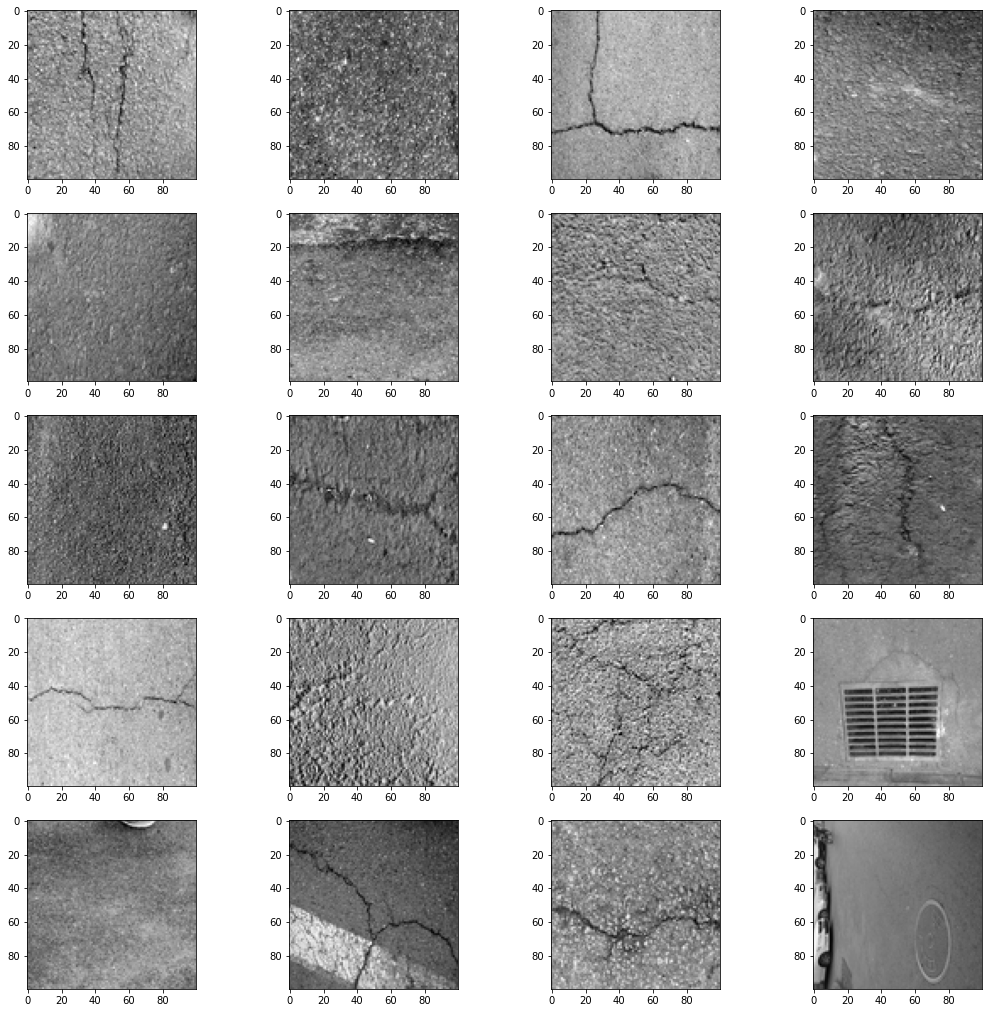

In [26]:
# Crack and Non-Crack Images
w=10
h=10
fig=plt.figure(figsize=(18,18))
columns = 4
rows = 5
for i in range(1, columns*rows + 1):
    img = crack_noncrack.iloc[i,crack_noncrack.columns != 'label'].values.reshape(100,100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

### 7. Creating Machine Learning models

In [27]:
import tensorflow as tf

In [28]:
# Let's import the train_test_split from Scikit-Learn to split the dataframe into
# train and test data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(crack_noncrack.loc[:,crack_noncrack.columns != 'label'],
                                                   crack_noncrack.loc[:,crack_noncrack.columns == 'label'],
                                                   shuffle=False,
                                                   random_state=42)

# Let's convert the dataframe into numpy array and reshape it into a way that 
# TensorFlow can work with
X_train = (np.array(X_train).reshape(982,100,100,1))/255.0
X_test = (np.array(X_test).reshape(328,100,100,1))/255.0
y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()

print('X_train_shape:',X_train.shape)
print('X_test_shape:',X_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)


X_train_shape: (982, 100, 100, 1)
X_test_shape: (328, 100, 100, 1)
y_train_shape: (982,)
y_test_shape: (328,)


In [29]:
model = tf.keras.models.Sequential([
    # First Convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second Convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(input_shape=(100,100)),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('non-crack') and 1 for the other ('cracks')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define a Callback class that stops training once accuracy reaches 95.0%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.95):
            print("\nReached 95.0% accuracy so cancelling training!")
            self.model.stop_training = True


from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

callbacks = myCallback()
history = model.fit(x = X_train,
                    y = y_train,
                    #steps_per_epoch=10,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    #validation_steps=8,
                    callbacks = [callbacks],
                    verbose=2
                   )

Epoch 1/100
31/31 - 5s - loss: 0.7379 - accuracy: 0.5662 - val_loss: 0.6442 - val_accuracy: 0.6250
Epoch 2/100
31/31 - 5s - loss: 0.6246 - accuracy: 0.6151 - val_loss: 0.5788 - val_accuracy: 0.6280
Epoch 3/100
31/31 - 5s - loss: 0.6026 - accuracy: 0.6619 - val_loss: 0.5849 - val_accuracy: 0.6128
Epoch 4/100
31/31 - 4s - loss: 0.5601 - accuracy: 0.6782 - val_loss: 0.5148 - val_accuracy: 0.7988
Epoch 5/100
31/31 - 4s - loss: 0.5089 - accuracy: 0.7617 - val_loss: 0.5300 - val_accuracy: 0.7287
Epoch 6/100
31/31 - 4s - loss: 0.5323 - accuracy: 0.7230 - val_loss: 0.7888 - val_accuracy: 0.5823
Epoch 7/100
31/31 - 4s - loss: 0.4308 - accuracy: 0.8086 - val_loss: 0.3222 - val_accuracy: 0.8780
Epoch 8/100
31/31 - 4s - loss: 0.3988 - accuracy: 0.8381 - val_loss: 0.2534 - val_accuracy: 0.9146
Epoch 9/100
31/31 - 4s - loss: 0.3506 - accuracy: 0.8432 - val_loss: 0.2765 - val_accuracy: 0.8811
Epoch 10/100
31/31 - 4s - loss: 0.3337 - accuracy: 0.8880 - val_loss: 0.2922 - val_accuracy: 0.8750
Epoch 11/

### 8. Potting the accuracy and loss charts

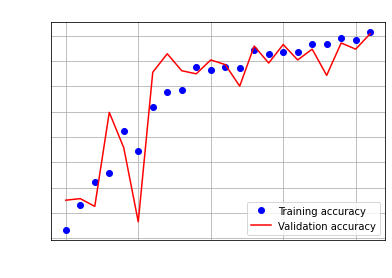

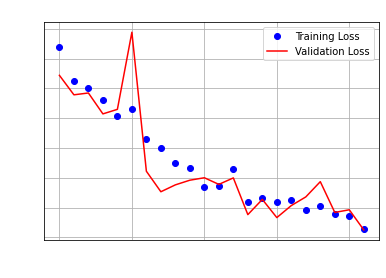

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy', c='white')
plt.xlabel('epochs', c='white')
plt.ylabel('Accuracy', c='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss', c='white')
plt.xlabel('epochs', c='white')
plt.ylabel('Loss', c='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.legend()

plt.grid()
plt.show()

### 9. Let's see what is the correct predictions percentage in the X_train and in the X_test

In [31]:
# Predictions in the X_train
y_pred_train = model.predict(X_train)
for i in range(0,len(y_pred_train)-1,1):
    if (y_pred_train[i]>0.5):
        y_pred_train[i]=1
    else:
        y_pred_train[i]=0

y_pred_train = np.array(y_pred_train).flatten()
print(y_pred_train == y_train)
print(' ')
print('Percentage correct in train_set:',np.sum(y_pred_train == y_train)/len(y_train))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  T

In [32]:
# Predictions in the X_test
y_pred = model.predict(X_test)
for i in range(0,len(y_pred)-1,1):
    if (y_pred[i]>0.5):
        y_pred[i]=1
    else:
        y_pred[i]=0

y_pred = np.array(y_pred).flatten()
print(y_pred == y_test)
print(' ')
print('Percentage correct in test_set:',np.sum(y_pred == y_test)/len(y_test))

[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  T

### 10. Let's get an unseen image and test the model

In [33]:
# In this function we have to pass the img_name like a string and the output will be the 
# Image and the classification (crack or non-crack)
def image_classification(img_name):
    img_test = Image.open('./Image test/'+img_name,'r')
    img_test = img_test.convert('L')
    img_test = img_test.resize((100,100))

    img_test_data = np.asarray(img_test.getdata(), dtype=np.float64)
    img_test_data = (img_test_data.reshape(-1,100,100,1))/255.0

    plt.imshow(img_test, cmap='gray')

    img_pred = model.predict(img_test_data)
    if (img_pred>0.5):
        print('This is a crack image')
    else:
        print('This is not a crack image')

This is not a crack image


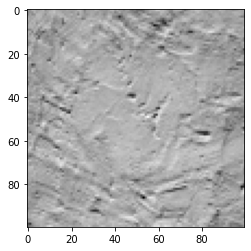

In [34]:
image_classification('texture-1504364_640.jpg')